## Importing Library

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Used for normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

## Importing Dataset

In [3]:
# Path to the dataframe
data_path = '../SavedData/simulated_transaction_2024.csv'

# Set the file path to a dataframe
biz_df = pd.read_csv(data_path)

## Business Names

In [4]:
business_names = list(biz_df['Third Party Name'].dropna().unique())

## Building Business Fingerprints

In [5]:
# Things that determine types of businesses:
# - Median size of payment
# - Payment ranges
# - Total number of payments
# - Number of unique payment days
# - Number of unique payment times

### Cleaninng the DataFrame columns

In [6]:
# Only include business names no 'nan' values
biz_tx_df = biz_df[biz_df['Third Party Name'].isin(business_names)]

# Exclude salary and refund payments
biz_tx_df = biz_tx_df[biz_tx_df['Amount'] < 0]

# Make Amount column positive
biz_tx_df['Amount'] = biz_tx_df['Amount'] * -1

# Remove capitalization and spaces from 'Third Party Name' column
biz_tx_df['Third Party Name'] = biz_tx_df['Third Party Name'].str.lower().str.replace(' ', '')

In [7]:
biz_tx_df['Third Party Name'].unique()

array(['halifax', 'lbg', 'blizzard', 'xbox', 'mojangstudios', 'puregym',
       'disney', 'netflix', 'grandunionbjj', 'amazon', 'squareonix',
       'deliveroo', 'justeat', 'cooplocal', 'selfridges', 'sainsbury',
       'theworks', "blackwell's", 'fatface', 'topshop', 'matalan',
       'foyles', 'tesco', 'wool', 'hobbylobby', 'revella',
       'sainsburylocal', 'starbucks', 'looselyfitted', 'stitchbystitch',
       'coffee#1', 'hobbycraft', 'ayarnstory', 'craftastic', 'kingsarms',
       'costacoffee', 'thecrown', 'lloydspharmacy', 'rose&crown',
       'fittedstitch', 'gamestation', 'cex', 'etsy', 'fivesensesart',
       'sportsdirect', 'cassart', 'brilliantbrushes', 'boots', 'reebok',
       'jdsports', 'head', 'frankie&bennies', 'gapkids', 'northface',
       'townhigh', 'collectorcave', 'barbieeboutique', 'rugbyfields',
       'mamas&papas', 'lavenderprimary', 'remedypluscare', 'specsavers',
       'kewhouse', 'hmv', 'visionexpress', 'millets', 'petscorner',
       'mothercare', 'ac

In [8]:
biz_tx_df[biz_tx_df['Third Party Name'] == 'blizzard']

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
997,01/01/2023,00:00,678330503.0,2956.010000,14.99,NaN,blizzard
1016,01/01/2023,00:00,203466392.0,3912.680000,14.99,NaN,blizzard
1017,01/01/2023,00:00,203466392.0,3897.690000,14.99,NaN,blizzard
1036,01/01/2023,00:00,779816907.0,524.040000,14.99,NaN,blizzard
1046,01/01/2023,00:00,350921975.0,1305.520000,14.99,NaN,blizzard
...,...,...,...,...,...,...,...
226662,30/11/2023,23:59,391559884.0,152.317150,14.99,NaN,blizzard
226675,30/11/2023,23:59,383833857.0,29617.479901,14.99,NaN,blizzard
226708,30/11/2023,23:59,449871732.0,8436.709131,14.99,NaN,blizzard
226711,30/11/2023,23:59,559995067.0,3859.345932,14.99,NaN,blizzard


### Calculating the different identifiers

In [9]:
biz_tx_median = biz_tx_df.groupby('Third Party Name')['Amount'].median().rename('Median')
biz_tx_iqr = biz_tx_df.groupby('Third Party Name')['Amount'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)).rename('IQR')
biz_tx_count = biz_tx_df.groupby('Third Party Name')['Amount'].count().rename('Count')
biz_tx_unique_days = biz_tx_df.groupby('Third Party Name')['Date'].nunique().rename('Unique Days Count')
biz_tx_unique_timestamps = biz_tx_df.groupby('Third Party Name')['Timestamp'].nunique().rename('Unique Timestamps Count')

In [10]:
biz_tx_id_df = pd.concat([biz_tx_median, biz_tx_iqr, biz_tx_count, biz_tx_unique_days, biz_tx_unique_timestamps], axis=1).reset_index()

In [11]:
biz_tx_id_df_lc = biz_tx_id_df[biz_tx_id_df['Count'] <= 3]
biz_tx_id_df = biz_tx_id_df[biz_tx_id_df['Count'] > 3]

In [12]:
biz_tx_id_df

,Third Party Name,Median,IQR,Count,Unique Days Count,Unique Timestamps Count
1,amazon,7.990,16.6600,9597,339,1202
2,ayarnstory,16.500,26.1475,280,189,201
4,blackwell's,22.960,18.9500,3846,340,519
5,blizzard,14.990,0.0000,4438,12,2
6,boots,17.720,27.9700,2046,322,857
7,brilliantbrushes,23.970,38.5000,1619,330,457
8,cassart,20.110,35.5225,262,175,177
9,cex,79.980,69.9800,514,110,292
10,coffee#1,5.750,1.1000,2298,322,206
12,cooplocal,25.000,40.7300,2610,336,971


### Normalizing the DataFrame

In [13]:
# Columns for normalization
cols = ['Median', 'IQR', 'Count', 'Unique Days Count', 'Unique Timestamps Count']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scalar to df and transform the df
norm_biz_tx_id_df = biz_tx_id_df.copy()
norm_biz_tx_id_df[cols] = scaler.fit_transform(biz_tx_id_df[cols])

In [14]:
norm_biz_tx_id_df

,Third Party Name,Median,IQR,Count,Unique Days Count,Unique Timestamps Count
1,amazon,0.002824,0.038037,0.282505,0.997033,0.998337
2,ayarnstory,0.013552,0.059697,0.007497,0.551929,0.166251
4,blackwell's,0.021696,0.043265,0.112754,1.000000,0.430590
5,blizzard,0.011648,0.000000,0.130228,0.026706,0.000831
6,boots,0.015090,0.063858,0.059624,0.946588,0.711554
7,brilliantbrushes,0.022969,0.087900,0.047020,0.970326,0.379052
8,cassart,0.018103,0.081102,0.006966,0.510386,0.146301
9,cex,0.093577,0.159772,0.014404,0.317507,0.241895
10,coffee#1,0.000000,0.002511,0.067062,0.946588,0.170407
12,cooplocal,0.024267,0.092991,0.076271,0.988131,0.806318


## Building the Clusters

### Finding the Correct Number of Clusters using an elbow graph

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

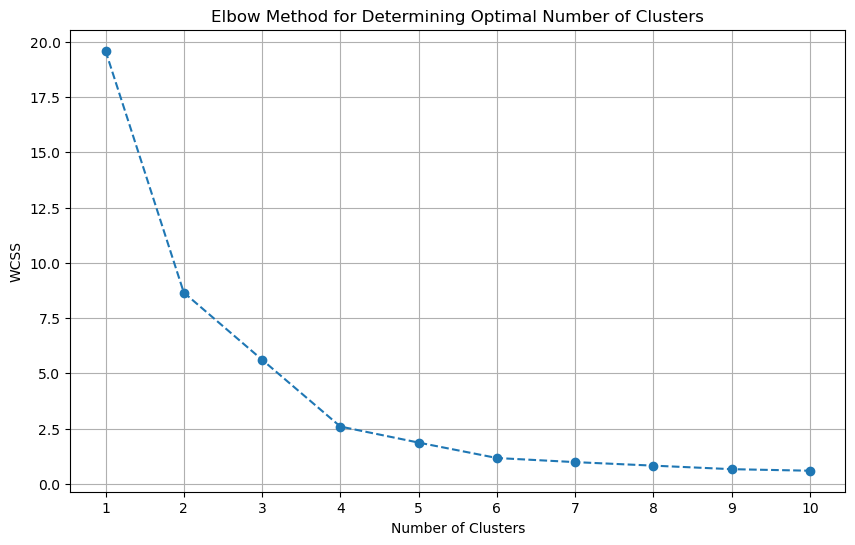

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# WCSS for each number of clusters
wcss = []

# Range of possible clusters
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(norm_biz_tx_id_df[cols])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### Creating Kmeans with the right number of clusters

In [16]:
# Define the number of clusters
n_clusters = 3

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit KMeans using the numeric columns
kmeans.fit(norm_biz_tx_id_df[cols])

# Assign the cluster labels to the DataFrame
norm_biz_tx_id_df['Cluster'] = kmeans.labels_

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
norm_biz_tx_id_df[norm_biz_tx_id_df['Cluster'] == 2]

,Third Party Name,Median,IQR,Count,Unique Days Count,Unique Timestamps Count,Cluster
5,blizzard,0.011648,0.000000,0.130228,0.026706,0.000831,2
9,cex,0.093577,0.159772,0.014404,0.317507,0.241895,2
16,disney,0.002824,0.000000,0.115883,0.026706,0.000831,2
21,foyles,0.028623,0.048465,0.000000,0.065282,0.020781,2
26,halifax,1.000000,1.000000,0.089318,0.026706,0.000000,2
30,hobbycraft,0.030589,0.092939,0.001594,0.192878,0.057357,2
35,kingsarms,0.000315,0.008447,0.001860,0.020772,0.068163,2
37,lbg,0.920580,0.893265,0.086543,0.026706,0.000000,2
43,mojangstudios,0.000303,0.000000,0.128192,0.026706,0.000831,2
46,netflix,0.012909,0.000000,0.228726,0.026706,0.000831,2


In [21]:
norm_biz_tx_id_df[norm_biz_tx_id_df['Cluster'] == 1]

,Third Party Name,Median,IQR,Count,Unique Days Count,Unique Timestamps Count,Cluster
2,ayarnstory,0.013552,0.059697,0.007497,0.551929,0.166251,1
4,blackwell's,0.021696,0.043265,0.112754,1.000000,0.430590,1
7,brilliantbrushes,0.022969,0.087900,0.047020,0.970326,0.379052,1
8,cassart,0.018103,0.081102,0.006966,0.510386,0.146301,1
10,coffee#1,0.000000,0.002511,0.067062,0.946588,0.170407,1
13,costacoffee,0.000063,0.002626,0.019215,0.866469,0.120532,1
14,craftastic,0.019830,0.065342,0.008944,0.614243,0.185370,1
20,fivesensesart,0.025578,0.087009,0.175005,0.997033,0.440565,1
23,gamestation,0.093577,0.136941,0.082529,0.516320,0.418121,1
25,grandunionbjj,0.118815,0.000000,0.107176,0.706231,0.249377,1


In [22]:
norm_biz_tx_id_df[norm_biz_tx_id_df['Cluster'] == 0]

,Third Party Name,Median,IQR,Count,Unique Days Count,Unique Timestamps Count,Cluster
1,amazon,0.002824,0.038037,0.282505,0.997033,0.998337,0
6,boots,0.015090,0.063858,0.059624,0.946588,0.711554,0
12,cooplocal,0.024267,0.092991,0.076271,0.988131,0.806318,0
15,deliveroo,0.029612,0.031826,0.204876,1.000000,0.878637,0
17,etsy,0.014749,0.063493,0.057410,0.952522,0.729011,0
18,fatface,0.107469,0.243659,0.273975,1.000000,0.960100,0
19,fittedstitch,0.027936,0.122808,0.085510,0.985163,0.901912,0
33,justeat,0.029682,0.031393,0.210337,1.000000,0.876974,0
38,lloydspharmacy,0.015682,0.064886,0.058178,0.937685,0.703242,0
39,looselyfitted,0.041784,0.158242,0.108976,1.000000,0.945137,0


## Setting Industries

In [ ]:
# Industry Mapping
industry_categories = {
    'topshop': 'apparel',
    'selfridges': 'apparel',
    'matalan': 'apparel',
    'revella': 'apparel',
    'looselyfitted': 'apparel',
    'fatface': 'apparel',
    'fittedstitch': 'apparel',
    'blackwells': 'books',
    'foyles': 'books',
    'ayarnstory': 'crafts',
    'brilliantbrushes': 'crafts',
    'cassart': 'crafts',
    'craftastic': 'crafts',
    'fivesensesart': 'crafts',
    'hobbylobby': 'crafts',
    'stitchbystitch': 'crafts',
    'theworks': 'crafts',
    'wool': 'crafts',
    'hobbycraft': 'crafts',
    'coffee#1': 'cafe',
    'costacoffee': 'cafe',
    'starbucks': 'cafe',
    'mamas&papas': 'children',
    'mothercare': 'children',
    'deliveroo': 'delivery',
    'justeat': 'delivery',
    'cex': 'electronics',
    'gamestation': 'electronics',
    'kewhouse': 'education',
    'lavenderprimary': 'education',
    'halifax': 'finance',
    'lbg': 'finance',
    'sainsbury': 'grocery',
    'sainsburylocal': 'grocery',
    'tesco': 'grocery',
    'cooplocal': 'grocery',
    'acutabove': 'hair and beauty',
    'barbieeboutique': 'hair and beauty',
    'remedypluscare': 'healthcare',
    'specsavers': 'healthcare',
    'universitycollegehospital': 'healthcare',
    'visionexpress': 'healthcare',
    'collectorcave': 'niche media',
    'hmv': 'niche media',
    'gapkids': 'niche apparel',
    'happydayshome': 'niche apparel',
    'millets': 'niche apparel',
    'mountainwarehouse': 'niche apparel',
    'northface': 'niche apparel',
    'head': 'niche sports',
    'rugbyfields': 'niche sports',
    'amazon': 'online shopping',
    'etsy': 'online shopping',
    'petscorner': 'pets',
    'lloydspharmacy': 'pharmacy',
    'boots': 'pharmacy',
    'kingsarms': 'pubs',
    'rose&crown': 'pubs',
    'thecrown': 'pubs',
    'frankie&bennies': 'restaurants',
    'grandunionbjj': 'sports',
    'jdsports': 'sports',
    'reebok': 'sports',
    'sportsdirect': 'sports',
    'blizzard': 'subscription',
    'disney': 'subscription',
    'mojangstudios': 'subscription',
    'netflix': 'subscription',
    'puregym': 'subscription',
    'squareonix': 'subscription',
    'xbox': 'subscription',
    'townhigh': 'other',
    'victoriapark': 'other'
}

In [285]:
biz_tx_id_df_lc

,Third Party Name,Median,IQR,Count,Unique Days Count,Unique Timestamps Count
0,acutabove,200.0,0.00,1,1,1
3,barbieeboutique,270.0,0.00,1,1,1
11,collectorcave,140.0,85.01,3,3,3
22,frankie&bennies,135.0,85.00,2,2,2
24,gapkids,260.0,0.00,1,1,1
27,happydayshome,200.0,0.00,1,1,1
28,head,200.0,0.00,1,1,1
29,hmv,150.0,0.00,1,1,1
34,kewhouse,230.0,100.00,3,3,3
36,lavenderprimary,130.0,100.00,3,3,3
